<a href="https://colab.research.google.com/github/adw1029/Data-Science-Notes/blob/master/CSCI_184_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files


In [ ]:
uploaded = files.upload()


Saving water_potability.csv to water_potability.csv


In [ ]:
df = pd.read_csv('water_potability.csv');
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
print('Shape of the Dataset =', df.shape)


Shape of the Dataset = (3276, 10)


In [ ]:
for column in df.columns:
    print(f"Column '{column}' has data type: {df[column].dtype}")

Column 'ph' has data type: float64
Column 'Hardness' has data type: float64
Column 'Solids' has data type: float64
Column 'Chloramines' has data type: float64
Column 'Sulfate' has data type: float64
Column 'Conductivity' has data type: float64
Column 'Organic_carbon' has data type: float64
Column 'Trihalomethanes' has data type: float64
Column 'Turbidity' has data type: float64
Column 'Potability' has data type: int64


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

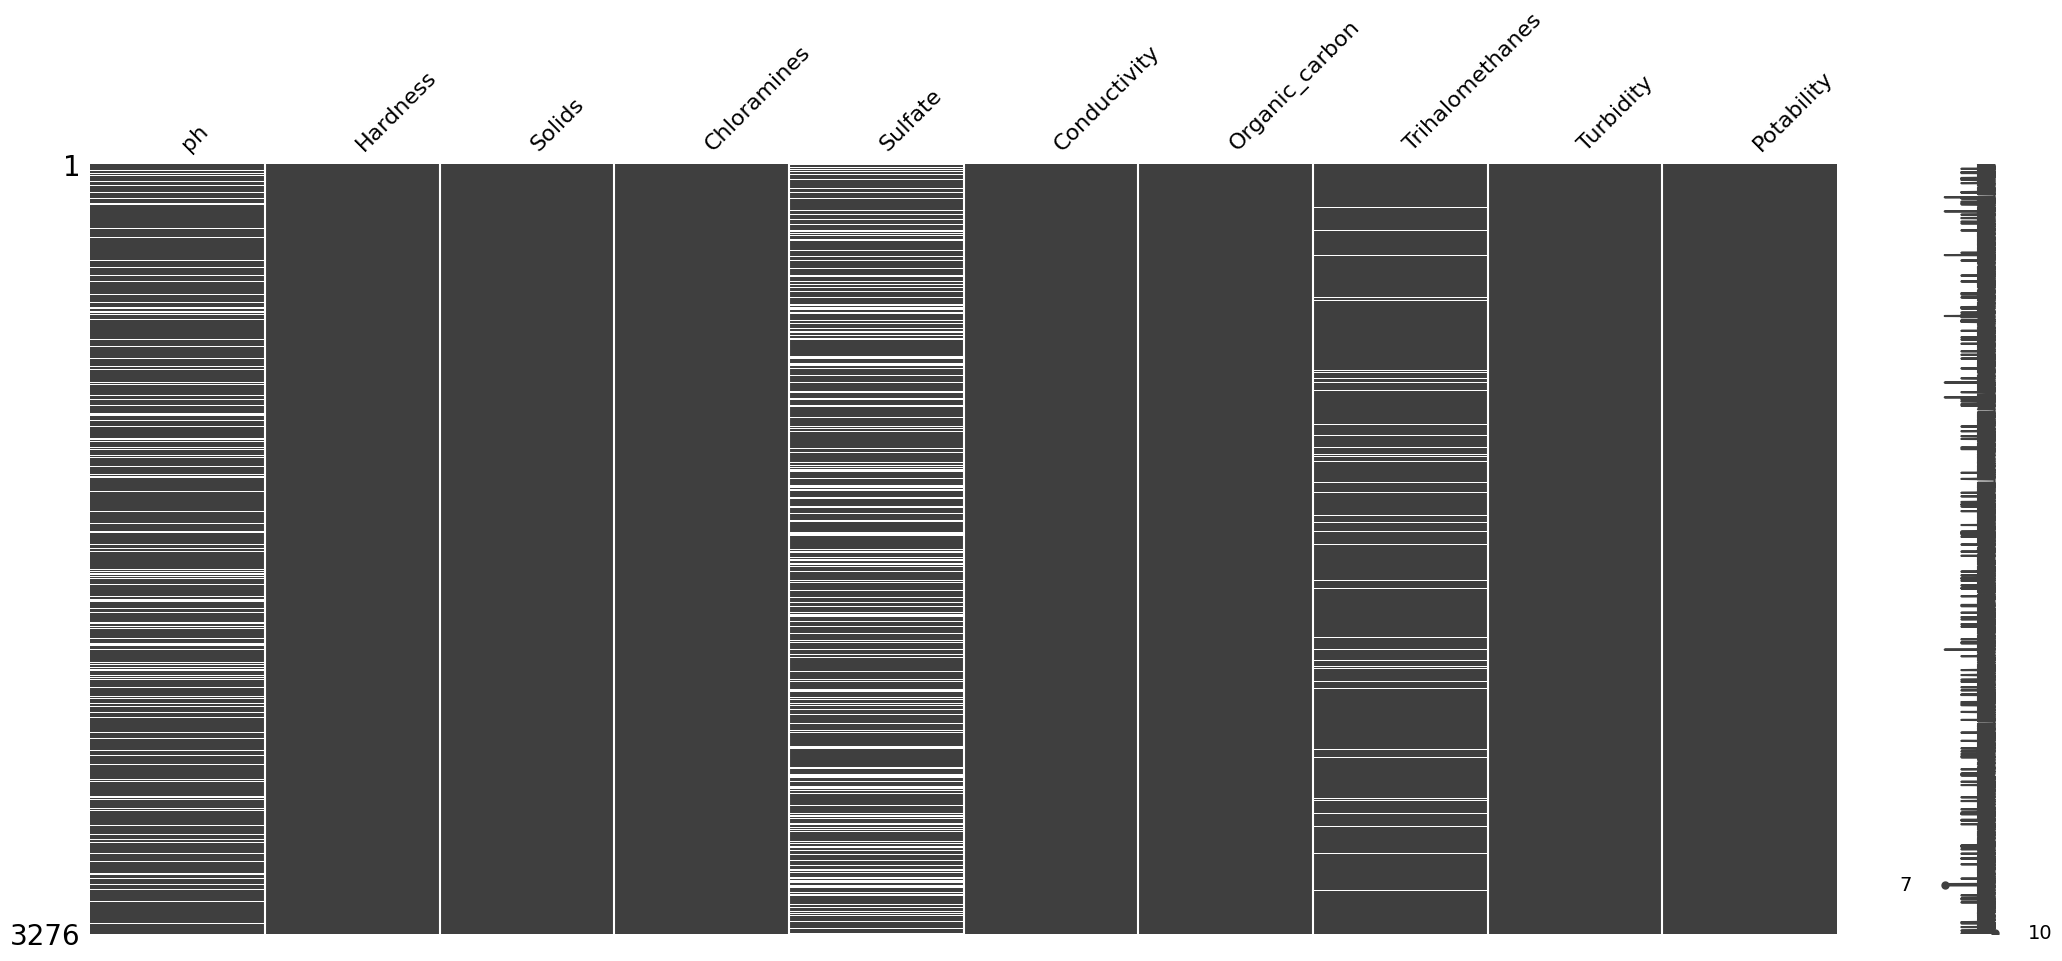

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
plt.show()

To best resolve the NULL values in the dateset, we would be examining each ph, sulfate, and trihalomethanes value's relationship to water potability.
We will be refer to the following article for each variable:
1. Sulfate: https://www.epa.gov/sites/default/files/2014-09/documents/support_cc1_sulfate_healtheffects.pdf
2. PH level: https://www3.uwsp.edu/cnr-ap/weal/Documents/HOPinterp.pdf
3. trihalomethanes: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1257669/

In [ ]:
print('PH Conditions:')
print('Potaility = 0 & Hardness <= 150:')
condition_1_ph = df[(df['Potability'] == 0) & (df['Hardness'] <= 150)][['ph']].mean()
print(condition_1_ph)
print('Potaility = 0 & Hardness > 150:')
condition_2_ph = df[(df['Potability'] == 0) & (df['Hardness'] > 150)][['ph']].mean()
print(condition_2_ph)
print('Potaility = 1 & Hardness <= 150:')
condition_3_ph = df[(df['Potability'] == 0) & (df['Hardness'] <= 150)][['ph']].mean()
print(condition_3_ph)
print('Potaility = 1 & Hardness > 150:')
condition_4_ph = df[(df['Potability'] == 0) & (df['Hardness'] > 150)][['ph']].mean()
print(condition_4_ph)

PH Conditions:
Potaility = 0 & Hardness <= 150:
ph    6.721973
dtype: float64
Potaility = 0 & Hardness > 150:
ph    7.112512
dtype: float64
Potaility = 1 & Hardness <= 150:
ph    6.721973
dtype: float64
Potaility = 1 & Hardness > 150:
ph    7.112512
dtype: float64


In [ ]:
for x in range(0, len(df)) :
    if (pd.isnull(df['ph'][x]) == True) :
        if ((df['Potability'][x] == 0) & (df['Hardness'][x] <= 150)):
           df['ph'][x] = condition_1_ph
        elif ((df['Potability'][x] == 0) & (df['Hardness'][x] > 150)):
           df['ph'][x] = condition_2_ph
        elif ((df['Potability'][x] == 1) & (df['Hardness'][x] <= 150)):
           df['ph'][x] = condition_3_ph
        elif ((df['Potability'][x] == 1) & (df['Hardness'][x] > 150)):
           df['ph'][x] = condition_4_ph

<ipython-input-12-662b0c509419>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ph'][x] = condition_2_ph
<ipython-input-12-662b0c509419>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ph'][x] = condition_1_ph
<ipython-input-12-662b0c509419>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ph'][x] = condition_4_ph
<ipython-input-12-662b0c509419>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [ ]:
print('Sulfate Conditions:')

print('Potability = 0:')
condition_1_sulfate = df[(df['Potability'] == 0)][['Sulfate']].mean()
print(condition_1_sulfate)
print('Potability = 1:')
condition_2_sulfate = df[(df['Potability'] == 1)][['Sulfate']].mean()
print(condition_2_sulfate)


Sulfate Conditions:
Potability = 0:
Sulfate    334.56429
dtype: float64
Potability = 1:
Sulfate    332.56699
dtype: float64


In [ ]:
for x in range(0, len(df)) :
    if (pd.isnull(df['Sulfate'][x]) == True) :
        if (df['Potability'][x] == 0) : df['Sulfate'][x] = condition_1_sulfate
        else : df['Sulfate'][x] = condition_2_sulfate

<ipython-input-14-851d70c5b3f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if (df['Potability'][x] == 0) : df['Sulfate'][x] = condition_1_sulfate
<ipython-input-14-851d70c5b3f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else : df['Sulfate'][x] = condition_2_sulfate


In [ ]:
print('Trihalomethanes Conditions:')

print('Potability = 0:')
condition_1_tri = df[(df['Potability'] == 0)][['Trihalomethanes']].mean()
print(condition_1_tri)
print('Potability = 1:')
condition_2_tri = df[(df['Potability'] == 1)][['Trihalomethanes']].mean()
print(condition_2_tri)


Trihalomethanes Conditions:
Potability = 0:
Trihalomethanes    66.303555
dtype: float64
Potability = 1:
Trihalomethanes    66.539684
dtype: float64


In [ ]:
for x in range(0, len(df)) :
    if (pd.isnull(df['Trihalomethanes'][x]) == True) :
        if (df['Potability'][x] == 0) : df['Trihalomethanes'][x] = condition_1_tri
        else : df['Trihalomethanes'][x] = condition_2_tri


<ipython-input-16-6f45469bc35e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if (df['Potability'][x] == 0) : df['Trihalomethanes'][x] = condition_1_tri
<ipython-input-16-6f45469bc35e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else : df['Trihalomethanes'][x] = condition_2_tri


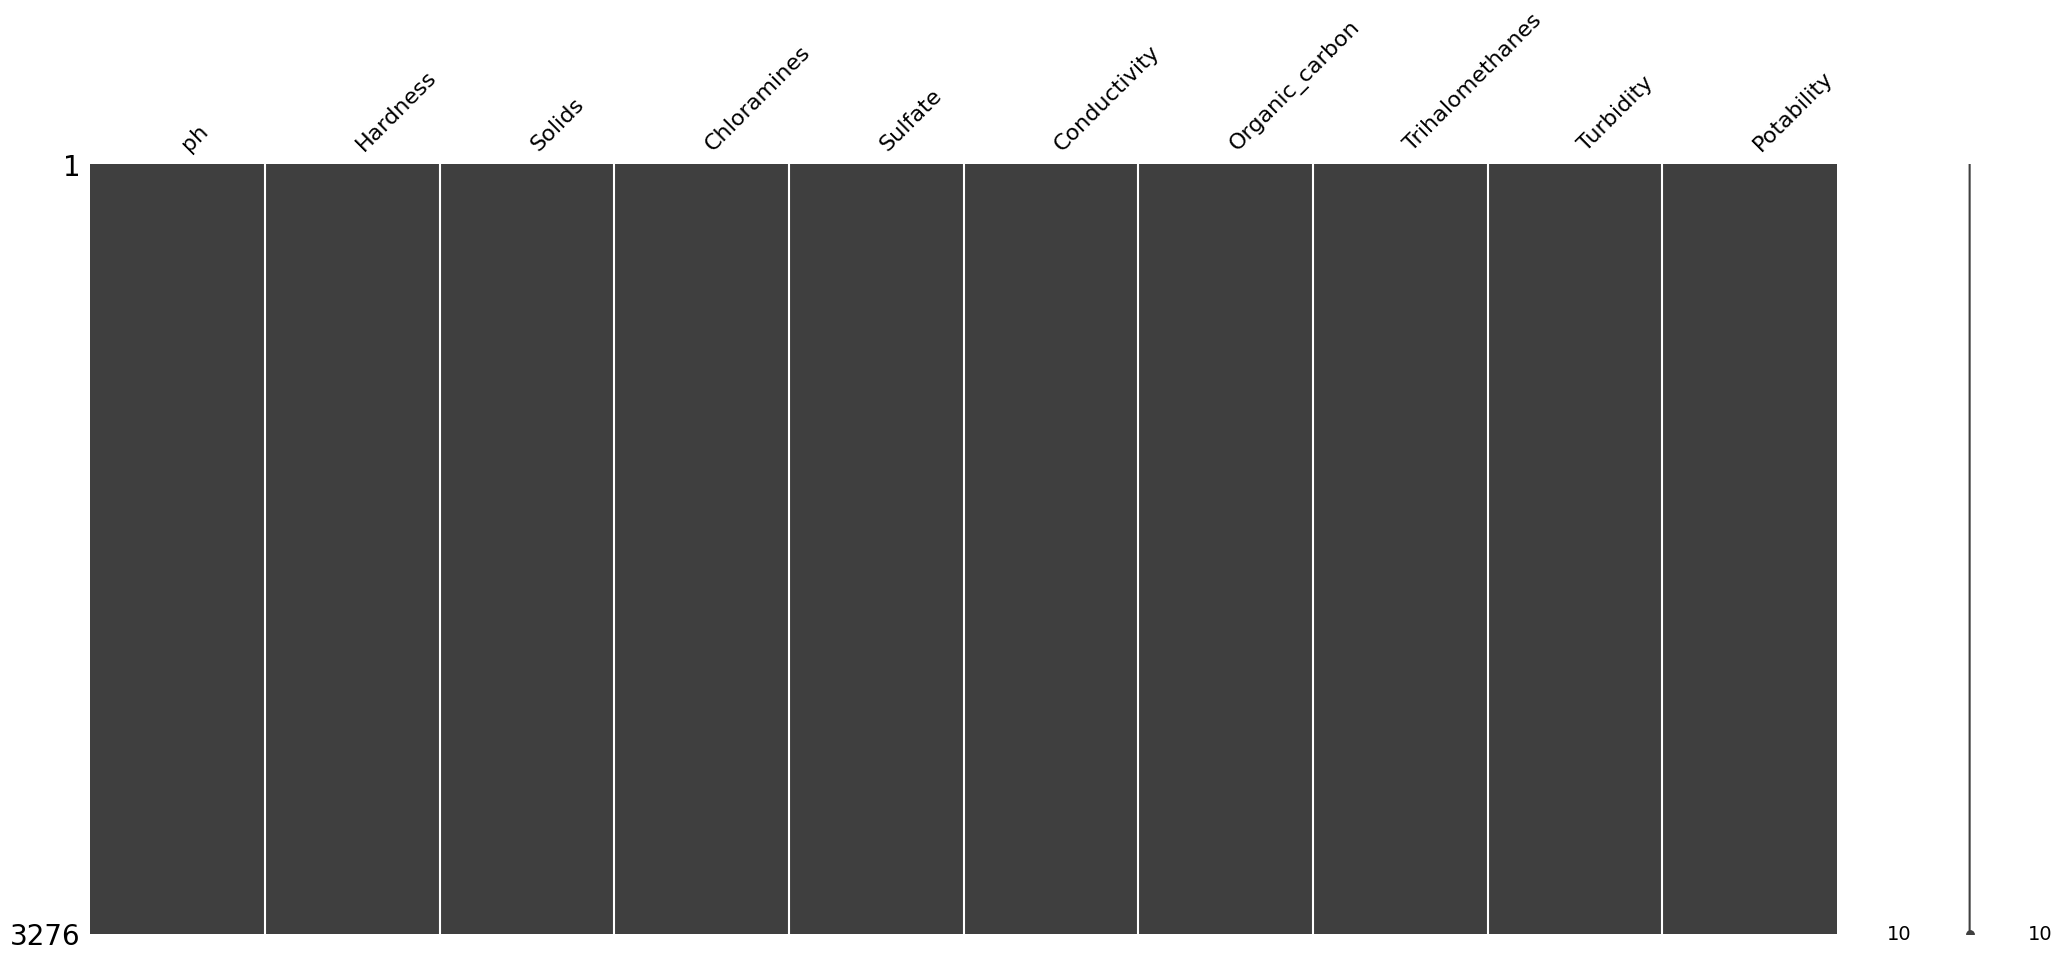

In [ ]:
msno.matrix(df)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
df = pd.DataFrame(normalized_data, columns=df.columns)


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,0.505796,0.540231,0.356173,0.529963,0.581725,0.427940,0.463026,0.532668,0.475853,0.390110
std,0.105036,0.119263,0.143968,0.123921,0.102678,0.141336,0.126750,0.127938,0.147548,0.487849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.448405,0.469432,0.251957,0.452088,0.534313,0.322196,0.378000,0.453584,0.376198,0.000000
50%,0.508037,0.542401,0.338338,0.530591,0.583939,0.420386,0.460473,0.531920,0.473630,0.000000
75%,0.562146,0.613857,0.443498,0.607662,0.628882,0.525145,0.550102,0.615994,0.576729,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import seaborn as sns

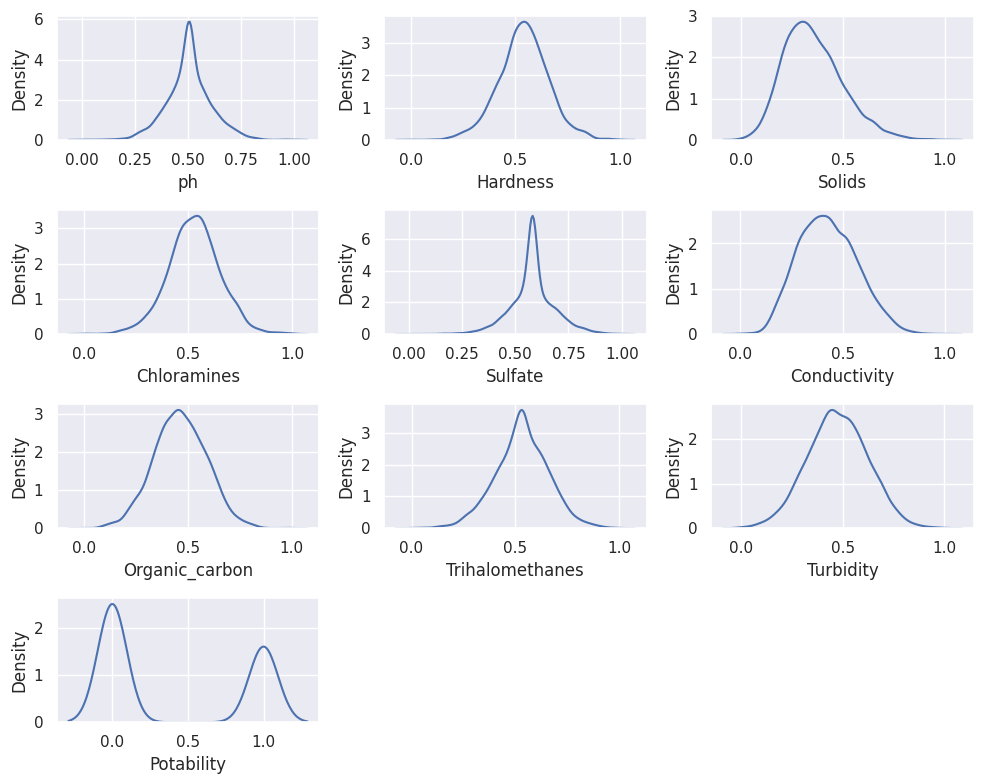

In [ ]:
plt.figure(figsize=(10,8))
for i,col in enumerate(df.columns):
    plt.subplot(4,3,i+1)
    sns.kdeplot(data=df[col])
    plt.tight_layout()

In [ ]:
# get inputs
X = df.iloc[:, :-1]
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.508037,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091
1,0.265434,0.297400,0.300611,0.491839,0.583939,0.719411,0.497319,0.450999,0.576793
2,0.578509,0.641311,0.321619,0.698543,0.583939,0.414652,0.562017,0.532866,0.303637
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327


In [ ]:
# get output
y = df.iloc[:, -1:]
y.head()

,Potability
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# 20% testing set, 80% training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('Shape of Data (20%)')
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

Shape of Data (20%)
X_train shape :  (2620, 9)
y_train shape :  (2620, 1)
X_test shape :  (656, 9)
y_test shape :  (656, 1)


In [ ]:
print('Random Forest 20%')
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_train = rf.predict(X_train)
rf_test = rf.predict(X_test)

# Training Metrics
rf_train_acc_1 = accuracy_score(y_train, rf_train)
rf_train_f1_1 = f1_score(y_train, rf_train, average = 'weighted')
rf_train_pre_1 = precision_score(y_train, rf_train, average = 'weighted')
rf_train_recall_1 = recall_score(y_train, rf_train, average = 'weighted')

# Testing Metrics
rf_test_acc_1 = accuracy_score(y_test, rf_test)
rf_test_f1_1 = f1_score(y_test, rf_test, average = 'weighted')
rf_test_precision_1 = precision_score(y_test, rf_test, average = 'weighted')
rf_test_recall_1 = recall_score(y_test, rf_test, average = 'weighted')


print('Training Accuracy Score :', rf_train_acc_1)
print('Training F1 Score :', rf_train_f1_1)
print('Training Precision Score :',rf_train_pre_1)
print('Training Recall Score :', rf_train_recall_1)

print('Testing Accuracy Score :', rf_test_acc_1)
print('Testing F1 Score :', rf_test_f1_1)
print('Testing Precision Score :', rf_test_precision_1)
print('Testing Recall Score :', rf_test_recall_1)

Random Forest 20%


<ipython-input-37-a63a2d60fac5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Training Accuracy Score : 1.0
Training F1 Score : 1.0
Training Precision Score : 1.0
Training Recall Score : 1.0
Testing Accuracy Score : 0.7759146341463414
Testing F1 Score : 0.7668897705897816
Testing Precision Score : 0.7752380736097864
Testing Recall Score : 0.7759146341463414


In [ ]:
print('SVM 20%')
from sklearn.datasets import make_classification

SVM = svm.SVC()

SVM.fit(X_train, y_train)
SVM_train = SVM.predict(X_train)
SVM_test = SVM.predict(X_test)

# Training Metrics
svm_train_acc_1 = accuracy_score(y_train, SVM_train)
svm_train_f1_1 = f1_score(y_train, SVM_train, average = 'weighted')
svm_train_pre_1 = precision_score(y_train, SVM_train, average = 'weighted')
svm_train_recall_1 = recall_score(y_train, SVM_train, average = 'weighted')

# Testing Metrics
svm_test_acc_1 = accuracy_score(y_test, SVM_test)
svm_test_f1_1 = f1_score(y_test, SVM_test, average = 'weighted')
svm_test_precision_1 = precision_score(y_test, SVM_test, average = 'weighted')
svm_test_recall_1 = recall_score(y_test, SVM_test, average = 'weighted')


print('Training Accuracy Score :', svm_train_acc_1)
print('Training F1 Score :', svm_train_f1_1)
print('Training Precision Score :',svm_train_pre_1)
print('Training Recall Score :', svm_train_recall_1)

print('Testing Accuracy Score :', svm_test_acc_1)
print('Testing F1 Score :', svm_test_f1_1)
print('Testing Precision Score :', svm_test_precision_1)
print('Testing Recall Score :', svm_test_recall_1)

SVM 20%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy Score : 0.7076335877862595
Training F1 Score : 0.665009199508099
Training Precision Score : 0.7499678227056189
Training Recall Score : 0.7076335877862595
Testing Accuracy Score : 0.6996951219512195
Testing F1 Score : 0.6535772050981697
Testing Precision Score : 0.7172863430970675
Testing Recall Score : 0.6996951219512195


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print('Shape of Data (30%)')
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

Shape of Data (30%)
X_train shape :  (2293, 9)
y_train shape :  (2293, 1)
X_test shape :  (983, 9)
y_test shape :  (983, 1)


In [ ]:
print('Random Forest 30%')
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_train = rf.predict(X_train)
rf_test = rf.predict(X_test)

# Training Metrics
rf_train_acc_2 = accuracy_score(y_train, rf_train)
rf_train_f1_2 = f1_score(y_train, rf_train, average = 'weighted')
rf_train_pre_2 = precision_score(y_train, rf_train, average = 'weighted')
rf_train_recall_2 = recall_score(y_train, rf_train, average = 'weighted')

# Testing Metrics
rf_test_acc_2 = accuracy_score(y_test, rf_test)
rf_test_f1_2 = f1_score(y_test, rf_test, average = 'weighted')
rf_test_precision_2 = precision_score(y_test, rf_test, average = 'weighted')
rf_test_recall_2 = recall_score(y_test, rf_test, average = 'weighted')


print('Training Accuracy Score :', rf_train_acc_2)
print('Training F1 Score :', rf_train_f1_2)
print('Training Precision Score :',rf_train_pre_2)
print('Training Recall Score :', rf_train_recall_2)

print('Testing Accuracy Score :', rf_test_acc_2)
print('Testing F1 Score :', rf_test_f1_2)
print('Testing Precision Score :', rf_test_precision_2)
print('Testing Recall Score :', rf_test_recall_2)

Random Forest 30%


<ipython-input-41-1399865bec2c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Training Accuracy Score : 1.0
Training F1 Score : 1.0
Training Precision Score : 1.0
Training Recall Score : 1.0
Testing Accuracy Score : 0.7711088504577823
Testing F1 Score : 0.7617094883759848
Testing Precision Score : 0.7701321371098518
Testing Recall Score : 0.7711088504577823


In [ ]:
print('SVM 30%')

SVM = svm.SVC()
SVM.fit(X_train, y_train)
SVM_train = SVM.predict(X_train)
SVM_test = SVM.predict(X_test)

# Training Metrics
svm_train_acc_2 = accuracy_score(y_train, SVM_train)
svm_train_f1_2 = f1_score(y_train, SVM_train, average = 'weighted')
svm_train_pre_2 = precision_score(y_train, SVM_train, average = 'weighted')
svm_train_recall_2 = recall_score(y_train, SVM_train, average = 'weighted')

# Testing Metrics
svm_test_acc_2 = accuracy_score(y_test, SVM_test)
svm_test_f1_2 = f1_score(y_test, SVM_test, average = 'weighted')
svm_test_precision_2 = precision_score(y_test, SVM_test, average = 'weighted')
svm_test_recall_2 = recall_score(y_test, SVM_test, average = 'weighted')


print('Training Accuracy Score :', svm_train_acc_2)
print('Training F1 Score :', svm_train_f1_2)
print('Training Precision Score :',svm_train_pre_2)
print('Training Recall Score :', svm_train_recall_2)

print('Testing Accuracy Score :', svm_test_acc_2)
print('Testing F1 Score :', svm_test_f1_2)
print('Testing Precision Score :', svm_test_precision_2)
print('Testing Recall Score :', svm_test_recall_2)

SVM 30%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy Score : 0.7003924989097252
Training F1 Score : 0.654418947708228
Training Precision Score : 0.7469136371396868
Training Recall Score : 0.7003924989097252
Testing Accuracy Score : 0.6846388606307223
Testing F1 Score : 0.630230350075371
Testing Precision Score : 0.6997336816604327
Testing Recall Score : 0.6846388606307223


In [ ]:
import pandas as pd
from tabulate import tabulate

# Define the categories and features
categories = ['Accuracy_Score', 'F1_Score', 'Precision_Score', 'Recall_Score']
features = ['Random Forest (20%)', 'SVM (20%)', 'Random Forst (30%)', 'SVM (30%)']

# Create an empty DataFrame
data = pd.DataFrame(index=categories, columns=features)

# Fill the DataFrame with values
data.loc['Accuracy_Score'] = [rf_test_acc_1, svm_test_acc_2, rf_test_acc_2, svm_test_acc_2]
data.loc['F1_Score'] = [rf_test_f1_1, svm_test_f1_1, rf_test_f1_2, svm_test_f1_2]
data.loc['Precision_Score'] = [rf_test_precision_1, svm_test_precision_1, rf_test_precision_2, svm_test_precision_2]
data.loc['Recall_Score'] = [rf_test_recall_1, svm_test_recall_1, rf_test_recall_2, svm_test_recall_2]

# Convert the DataFrame to a tabulated format
table = tabulate(data, headers='keys', tablefmt='psql')

# Display the tabulated table
print(table)


+-----------------+-----------------------+-------------+----------------------+-------------+
|                 |   Random Forest (20%) |   SVM (20%) |   Random Forst (30%) |   SVM (30%) |
|-----------------+-----------------------+-------------+----------------------+-------------|
| Accuracy_Score  |              0.775915 |    0.684639 |             0.771109 |    0.684639 |
| F1_Score        |              0.76689  |    0.653577 |             0.761709 |    0.63023  |
| Precision_Score |              0.775238 |    0.717286 |             0.770132 |    0.699734 |
| Recall_Score    |              0.775915 |    0.699695 |             0.771109 |    0.684639 |
+-----------------+-----------------------+-------------+----------------------+-------------+
